# Exploring EMGSD Dataset

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from IPython import display

In [2]:
import pandas as pd

splits = {'train': 'train.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/ucabtk1/EMGSD/" + splits["train"])
train_data = pd.read_csv("hf://datasets/ucabtk1/EMGSD/" + splits["train"])

test_data = pd.read_csv("hf://datasets/ucabtk1/EMGSD/" + splits["test"])

In [3]:
train_data.head()

# print(train_data.info())

,stereotype_type,text,text_with_marker,category,data_source,label
0,profession,The illustrator had tower hands.,The illustrator had ===tower=== hands.,unrelated,stereoset_intrasentence,unrelated
1,profession,I gave that physician 5 stars because he was s...,I gave that physician 5 stars because he was s...,unrelated,stereoset_intrasentence,unrelated
2,nationality,Peru is a great place for a vacation the sky i...,Peru is a great place for a vacation ===the sk...,unrelated,stereoset_intersentence,unrelated
3,profession,That chef cooked a great meal. Throw that fur ...,That chef cooked a great meal. ===Throw that f...,unrelated,stereoset_intersentence,unrelated
4,nationality,Ecuadorian economy produces many toaster indiv...,Ecuadorian economy produces many ===toaster===...,unrelated,stereoset_intrasentence,unrelated


In [4]:
print(f'Train: {train_data.isnull().sum()} \n Test:{train_data.isnull().sum()}')

Train: stereotype_type     0
text                0
text_with_marker    0
category            0
data_source         0
label               0
dtype: int64 
 Test:stereotype_type     0
text                0
text_with_marker    0
category            0
data_source         0
label               0
dtype: int64


In [5]:
train_data.nunique()

stereotype_type         6
text                45692
text_with_marker    45067
category                3
data_source             5
label                  13
dtype: int64

In [6]:
test_data.nunique()

stereotype_type         6
text                11437
text_with_marker    11297
category                3
data_source             5
label                  13
dtype: int64

In [7]:
train_data.describe()

,stereotype_type,text,text_with_marker,category,data_source,label
count,45760,45760,45760,45760,45760,45760
unique,6,45692,45067,3,5,13
top,nationality,all Queer people are unique.,Placeholder not found in the first sentence.,stereotype,stereoset_intrasentence,unrelated
freq,20584,3,534,15597,20437,14992


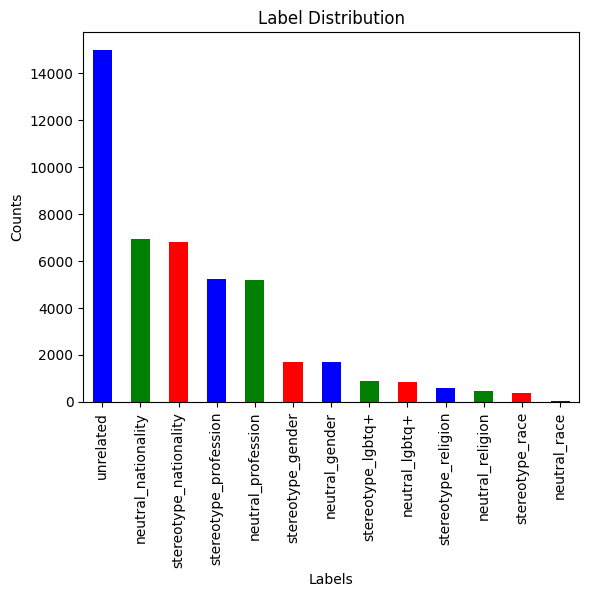

In [8]:
label_counts = train_data['label'].value_counts()

label_counts.plot(kind="bar",color=['blue','green','red'])

plt.title("Label Distribution")

plt.xlabel("Labels")

plt.ylabel("Counts")

plt.show()

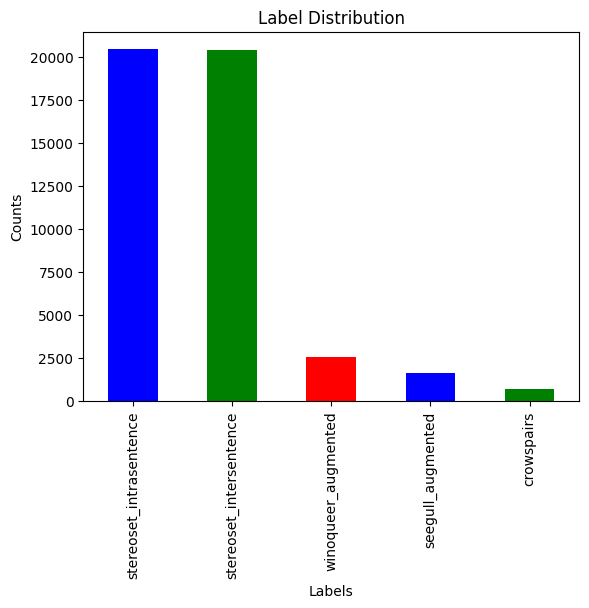

In [9]:
label_counts = train_data['data_source'].value_counts()

label_counts.plot(kind="bar",color=['blue','green','red'])

plt.title("Label Distribution")

plt.xlabel("Labels")

plt.ylabel("Counts")

plt.show()

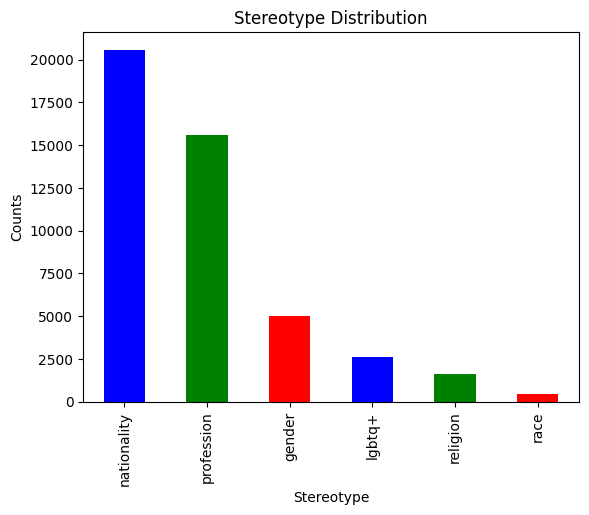

In [10]:
stereotype_counts = train_data['stereotype_type'].value_counts()

stereotype_counts.plot(kind="bar",color=['blue','green','red'])

plt.title("Stereotype Distribution")

plt.xlabel("Stereotype")

plt.ylabel("Counts")

plt.show()

count    45760.000000
mean        62.776989
std         29.791869
min         13.000000
25%         41.000000
50%         57.000000
75%         78.000000
max        320.000000
Name: text_length, dtype: float64


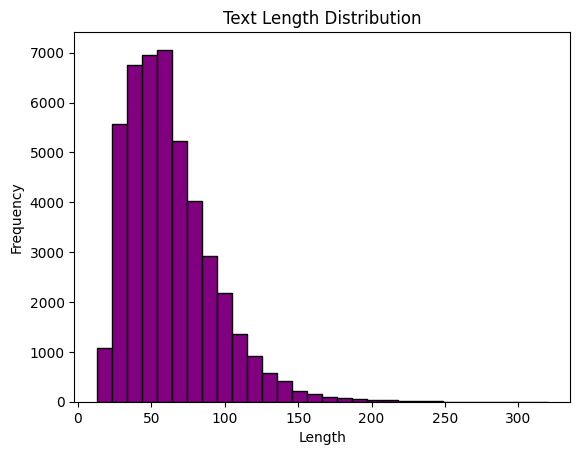

In [11]:
# Add a column for text length

train_data['text_length'] = train_data['text'].apply(len)



# Summary statistics for text length

print(train_data['text_length'].describe())



# Visualize text length

plt.hist(train_data['text_length'], bins=30, color='purple', edgecolor='black')

plt.title("Text Length Distribution")

plt.xlabel("Length")

plt.ylabel("Frequency")

plt.show()


In [12]:
# Check for the presence of markers

train_data['contains_marker'] = train_data['text_with_marker'].str.contains("===")

print(train_data['contains_marker'].value_counts())



# Examples of texts with markers

(train_data[train_data['contains_marker']].head())


contains_marker
True     40899
False     4861
Name: count, dtype: int64


,stereotype_type,text,text_with_marker,category,data_source,label,text_length,contains_marker
0,profession,The illustrator had tower hands.,The illustrator had ===tower=== hands.,unrelated,stereoset_intrasentence,unrelated,32,True
1,profession,I gave that physician 5 stars because he was s...,I gave that physician 5 stars because he was s...,unrelated,stereoset_intrasentence,unrelated,55,True
2,nationality,Peru is a great place for a vacation the sky i...,Peru is a great place for a vacation ===the sk...,unrelated,stereoset_intersentence,unrelated,58,True
3,profession,That chef cooked a great meal. Throw that fur ...,That chef cooked a great meal. ===Throw that f...,unrelated,stereoset_intersentence,unrelated,56,True
4,nationality,Ecuadorian economy produces many toaster indiv...,Ecuadorian economy produces many ===toaster===...,unrelated,stereoset_intrasentence,unrelated,52,True


# Granularity Setup

## Sentence Level

In [13]:
from sklearn.preprocessing import LabelEncoder



encoder = LabelEncoder()

# encoder.fit(train_data['label'])



# train_data['encoded_label'] = encoder.transform(train_data['label'])

# test_data['encoded_label'] = encoder.transform(test_data['label'])

# print(encoder.classes_)

In [14]:
# changing multiple subcategories into 3 labels

def combine_labels(label):

    if label.startswith("neutral"):

        return "neutral"

    elif label.startswith("stereotype"):

        return "stereotype"

    else:

        return "unrelated"



train_data["combined_label"] = train_data["label"].apply(combine_labels)

test_data["combined_label"] = test_data["label"].apply(combine_labels)

In [15]:
# transforming using encoder

encoder.fit(train_data['combined_label'])

train_data['encoded_combined_label'] = encoder.transform(train_data['combined_label'])

test_data['encoded_combined_label'] = encoder.transform(test_data['combined_label'])



print("Label Encoding mapping: ", dict(zip(encoder.classes_, range(len(encoder.classes_)))))

Label Encoding mapping:  {'neutral': 0, 'stereotype': 1, 'unrelated': 2}


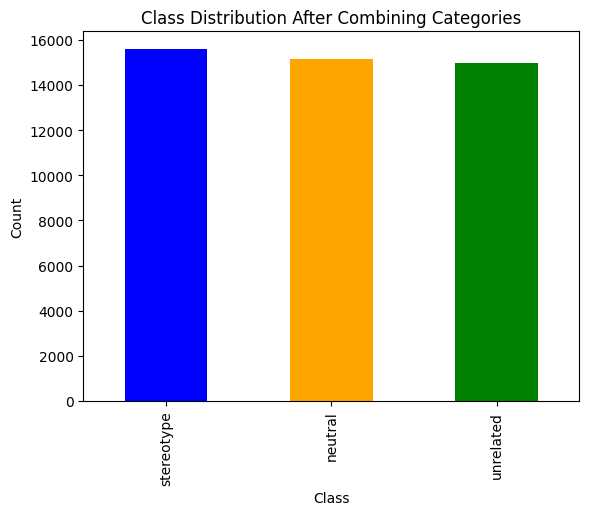

In [16]:
import matplotlib.pyplot as plt



# Count occurrences of each class

class_counts = train_data['combined_label'].value_counts()



# Plot class distribution

class_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

plt.title("Class Distribution After Combining Categories")

plt.xlabel("Class")

plt.ylabel("Count")

plt.show()


# Binary Classification

In [17]:
train_data['binary_label'] = train_data['combined_label'].apply(lambda x: 1 if x == 'stereotype' else 0)

test_data['binary_label'] = test_data['combined_label'].apply(lambda x: 1 if x == 'stereotype' else 0)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Step 2: Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # TF-IDF vectorizer for feature extraction
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['binary_label']
y_test = test_data['binary_label']

# Step 3: Model Training
model = LogisticRegression(max_iter=1000)  # Logistic Regression for binary classification
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5: Save the model and vectorizer
import joblib

joblib.dump(model, 'binary_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved!")

Accuracy: 0.7342
Precision: 0.6935
Recall: 0.3968
F1-Score: 0.5048

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      7535
           1       0.69      0.40      0.50      3906

    accuracy                           0.73     11441
   macro avg       0.72      0.65      0.66     11441
weighted avg       0.73      0.73      0.71     11441

Model and vectorizer saved!
